###Μηχανική Μάθηση
####1η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

 `⚠️  Το σύνολο δεδομένων που σας δόθηκε δεν πρέπει να εμπλουτισθεί με οποιοδήποτε τρόπο. Η εργασία στην οποία θα χρησιμοποιηθεί εμπλουτισμένο σύνολο δεδομένων, δεν θα διορθωθεί.`

In [619]:
#%pip install pandas

In [620]:
#!pip install seaborn

In [621]:
#!pip install wordcloud

In [622]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [623]:
import seaborn as sns

In [624]:
import numpy as np

In [625]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

Ονοματεπώνυμο φοιτητή: ΚΛΕΜΠΕΤΣΑΝΗΣ ΓΕΩΡΓΙΟΣ

Α.Μ.: 03120157

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1_ndkaT6BoDuxxPPxLWq-oKDJqzO1Dlhg/view?usp=sharing) .


1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [626]:
df = pd.read_csv('./train-val.csv')

1.β. Φορτώστε το σύνολο δεδομένων "test.csv" στο notebook σας

In [627]:
train_test = pd.read_csv('./test.csv')

### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA)
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων.

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων,

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών,

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

In [628]:
selected_column = [
    'id',
    'Date',
    'Location',
    'MinTemp',
    'MaxTemp',
    'Rainfall',
    'Evaporation',
    'Sunshine',
    'WindGustDir',
    'WindGustSpeed',
    'WindDir9am',
    'WindDir3pm',
    'WindSpeed9am',
    'WindSpeed3pm',
    'Humidity9am',
    'Humidity3pm',
    'Pressure9am',
    'Pressure3pm',
    'Cloud9am',
    'Cloud3pm',
    'Temp9am',
    'Temp3pm',
    'RainToday',
    'RainTomorrow',
]

### 2α
### Πλήθος των Δειγμάτων

In [629]:
num_samples = df.shape[0]
print(f"Number of samples : {num_samples}")

Number of samples : 48423


### Πλήθος Χαρακτηριστικών

In [630]:
num_columns = df.shape[1]
print(f"Number of characteristics: {num_columns}")

Number of characteristics: 24


### 2β
### Τα είδη των χαρακτηριστικών του συνόλου δεδομένων

In [631]:
column_data_types = df.dtypes

print("Data types of characteristics:")
print(column_data_types)

Data types of characteristics:
id                 int64
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object


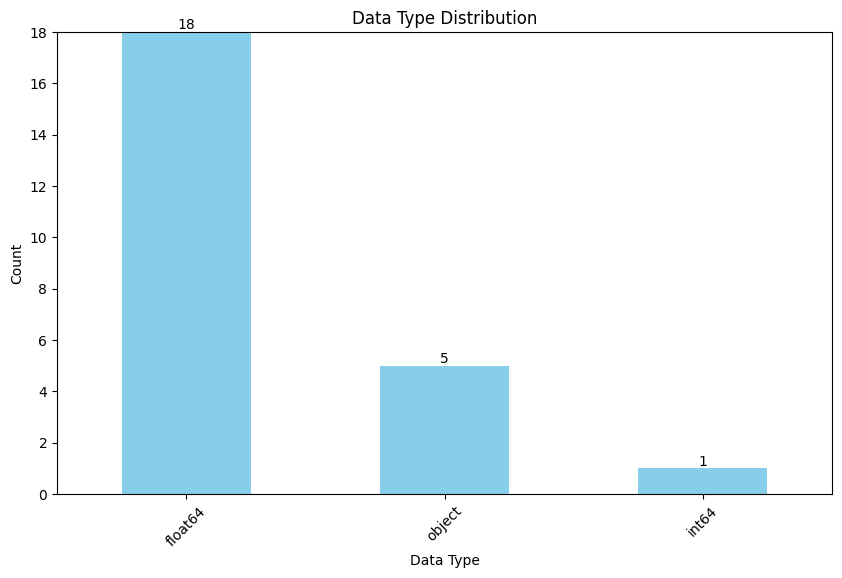

In [632]:
data_type_counts = column_data_types.value_counts()

custom_y_limits = (0, 18)
data_type_counts = column_data_types.value_counts()

# Create a bar chart to visualize data type distribution
plt.figure(figsize=(10, 6))
ax = data_type_counts.plot(kind='bar', color='skyblue')
plt.title('Data Type Distribution')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(custom_y_limits)
for i, v in enumerate(data_type_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

### 2γ
### Οι ετικέτες των χαρακτηριστικών

In [633]:
column_labels = df.columns

print("Labels of characteristics:")
print(column_labels)

Labels of characteristics:
Index(['id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


### 2δ
### Το πλήθος των κατηγοριών

In [634]:
categories_dict = {}

for column_name in selected_column:
  num_categories = df[column_name].nunique()
  categories_dict[column_name] = num_categories

for column_name, num_categories in categories_dict.items():
  print(f"Number of categories in '{column_name}': {num_categories}")

Number of categories in 'id': 48423
Number of categories in 'Date': 2534
Number of categories in 'Location': 49
Number of categories in 'MinTemp': 364
Number of categories in 'MaxTemp': 456
Number of categories in 'Rainfall': 443
Number of categories in 'Evaporation': 231
Number of categories in 'Sunshine': 140
Number of categories in 'WindGustDir': 16
Number of categories in 'WindGustSpeed': 61
Number of categories in 'WindDir9am': 16
Number of categories in 'WindDir3pm': 16
Number of categories in 'WindSpeed9am': 40
Number of categories in 'WindSpeed3pm': 42
Number of categories in 'Humidity9am': 101
Number of categories in 'Humidity3pm': 101
Number of categories in 'Pressure9am': 508
Number of categories in 'Pressure3pm': 497
Number of categories in 'Cloud9am': 10
Number of categories in 'Cloud3pm': 9
Number of categories in 'Temp9am': 396
Number of categories in 'Temp3pm': 452
Number of categories in 'RainToday': 2
Number of categories in 'RainTomorrow': 2


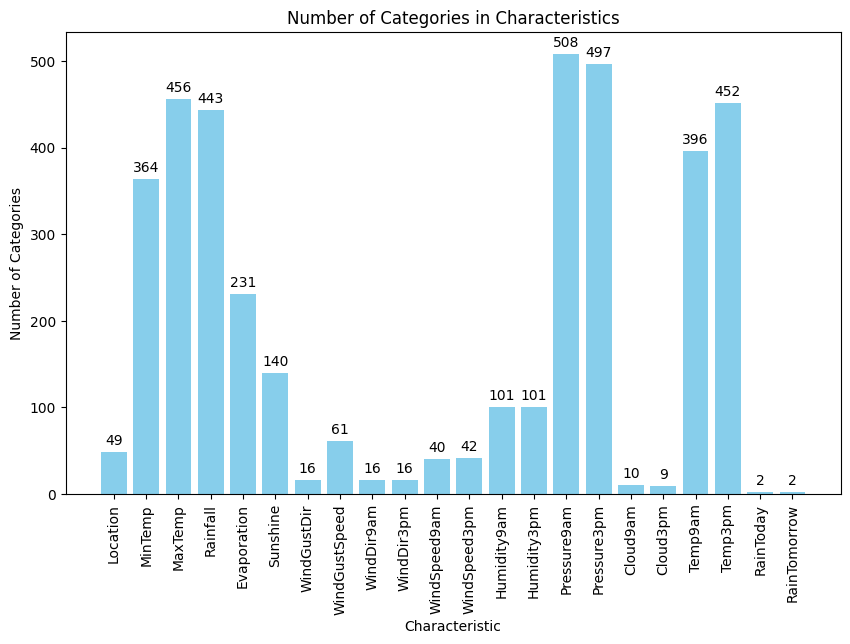

In [635]:
first_characteristic = list(categories_dict.keys())[0]
second_characteristic = list(categories_dict.keys())[1]
del categories_dict[first_characteristic]
del categories_dict[second_characteristic]


plt.figure(figsize=(10, 6))
ax = plt.bar(categories_dict.keys(), categories_dict.values(), color='skyblue')
plt.title('Number of Categories in Characteristics')
plt.xlabel('Characteristic')
plt.ylabel('Number of Categories')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
for bar, num_categories in zip(ax, categories_dict.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(num_categories), ha='center', va='bottom')
plt.show()

### 2ε
### Πλήθος δειγμάτων που ανήκουν σε κάθε κατηγορία

In [636]:
sample_counts_dict = {}

for column_name in selected_column:
  category_counts = df[column_name].value_counts().to_dict()
  sample_counts_dict[column_name] = category_counts

for column_name, category_counts in sample_counts_dict.items():
  print(f"Sample counts in '{column_name}':")
  for category, count in category_counts.items():
    print(f"{category}: {count}")

Sample counts in 'id':
1: 1
32287: 1
32278: 1
32279: 1
32280: 1
32281: 1
32282: 1
32283: 1
32284: 1
32285: 1
32286: 1
32288: 1
32276: 1
32289: 1
32290: 1
32291: 1
32292: 1
32293: 1
32294: 1
32295: 1
32296: 1
32297: 1
32277: 1
32275: 1
32252: 1
32263: 1
32254: 1
32255: 1
32256: 1
32257: 1
32258: 1
32259: 1
32260: 1
32261: 1
32262: 1
32264: 1
32274: 1
32265: 1
32266: 1
32267: 1
32268: 1
32269: 1
32270: 1
32271: 1
32272: 1
32273: 1
32298: 1
32299: 1
32300: 1
32334: 1
32325: 1
32326: 1
32327: 1
32328: 1
32329: 1
32330: 1
32331: 1
32332: 1
32333: 1
32335: 1
32301: 1
32336: 1
32337: 1
32338: 1
32339: 1
32340: 1
32341: 1
32342: 1
32343: 1
32344: 1
32324: 1
32323: 1
32322: 1
32321: 1
32302: 1
32303: 1
32304: 1
32305: 1
32306: 1
32307: 1
32308: 1
32309: 1
32310: 1
32311: 1
32312: 1
32313: 1
32314: 1
32315: 1
32316: 1
32317: 1
32318: 1
32319: 1
32320: 1
32253: 1
32251: 1
32535: 1
32192: 1
32183: 1
32184: 1
32185: 1
32186: 1
32187: 1
32188: 1
32189: 1
32190: 1
32191: 1
32193: 1
32181: 1
32194: 1


### 2στ
### Συσχέτιση μεταξύ των δεδομένων

In [637]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.drop(['Date'], axis = 1,inplace=True) 
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             48423 non-null  int64  
 1   Location       48423 non-null  object 
 2   MinTemp        48263 non-null  float64
 3   MaxTemp        48322 non-null  float64
 4   Rainfall       48423 non-null  float64
 5   Evaporation    28039 non-null  float64
 6   Sunshine       25426 non-null  float64
 7   WindGustDir    45302 non-null  object 
 8   WindGustSpeed  45330 non-null  float64
 9   WindDir9am     44602 non-null  object 
 10  WindDir3pm     47095 non-null  object 
 11  WindSpeed9am   48066 non-null  float64
 12  WindSpeed3pm   47566 non-null  float64
 13  Humidity9am    47865 non-null  float64
 14  Humidity3pm    47164 non-null  float64
 15  Pressure9am    43643 non-null  float64
 16  Pressure3pm    43634 non-null  float64
 17  Cloud9am       30533 non-null  float64
 18  Cloud3

In [638]:
numeric_df = df.select_dtypes(include=['float64'])#vazw mono tous arithmous
correlation_matrix = numeric_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.715692  0.096510     0.457483  0.053477   
MaxTemp        0.715692  1.000000 -0.103864     0.586798  0.469859   
Rainfall       0.096510 -0.103864  1.000000    -0.069284 -0.210261   
Evaporation    0.457483  0.586798 -0.069284     1.000000  0.351482   
Sunshine       0.053477  0.469859 -0.210261     0.351482  1.000000   
WindGustSpeed  0.163349  0.013580  0.160382     0.194751 -0.051283   
WindSpeed9am   0.193476  0.003229  0.102262     0.208774 -0.001514   
WindSpeed3pm   0.183079  0.054409  0.068231     0.154487  0.055941   
Humidity9am   -0.232420 -0.485241  0.217506    -0.521304 -0.471021   
Humidity3pm    0.021193 -0.504320  0.258283    -0.392778 -0.634892   
Pressure9am   -0.372295 -0.224734 -0.178761    -0.226294  0.078309   
Pressure3pm   -0.385832 -0.331614 -0.125762    -0.261228  0.010106   
Cloud9am       0.071455 -0.304386  0.202290    -0.188185 -0.693561   


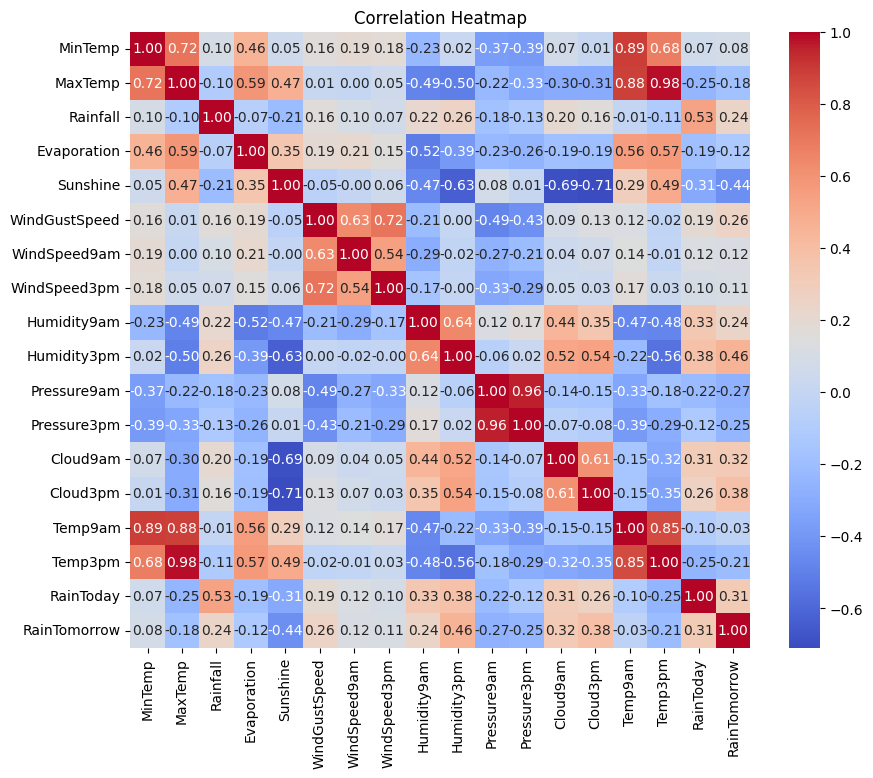

In [639]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

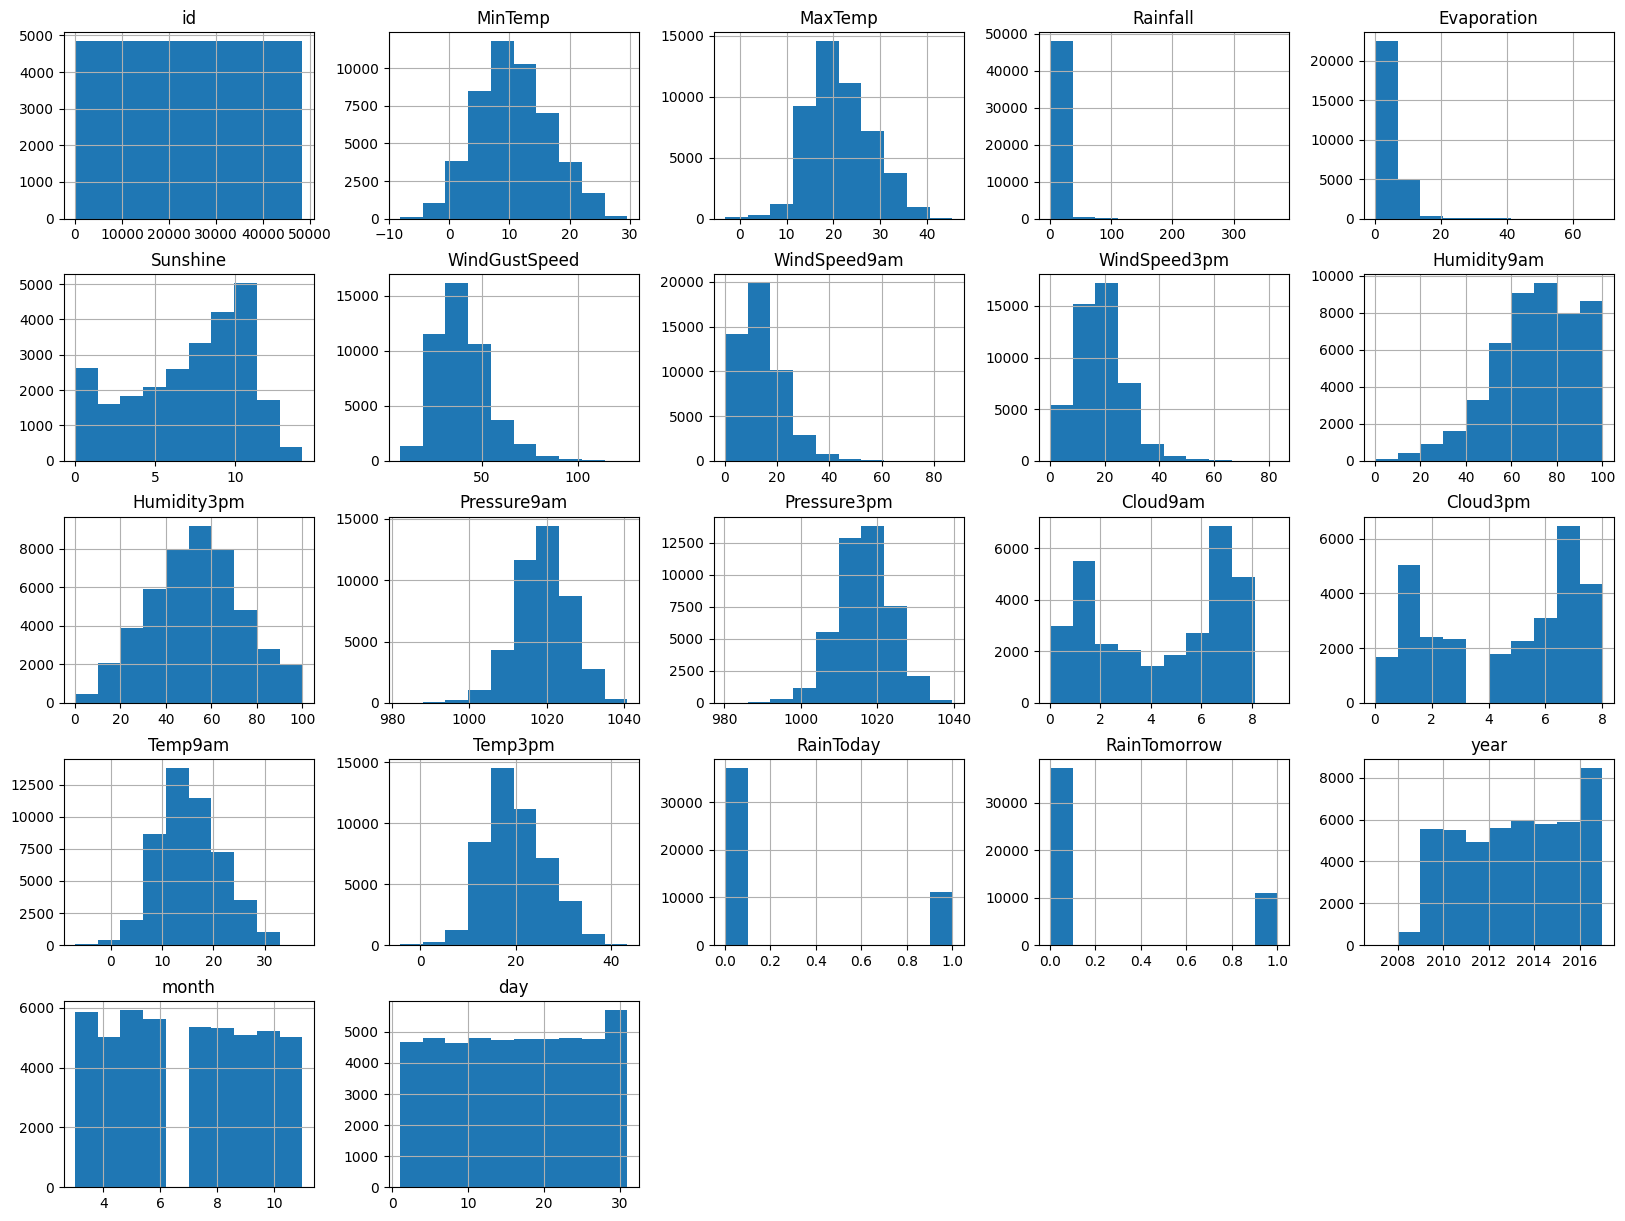

In [640]:
df.hist(bins=10, figsize=(20, 15))
plt.show()

### Έλεγχος αν τα δεδομένα είναι balanced ή unbalanced

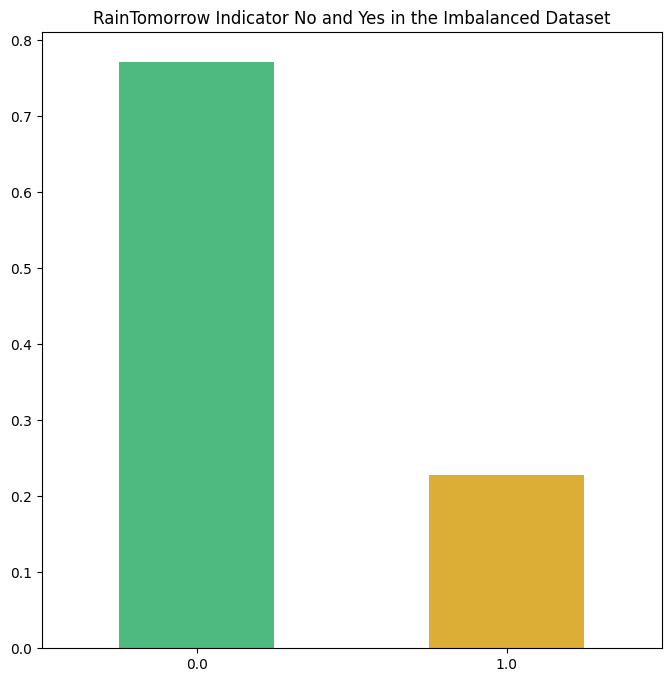

In [641]:
plt.figure(figsize=(8,8))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['MediumSeaGreen','Goldenrod'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No and Yes in the Imbalanced Dataset')
plt.show()

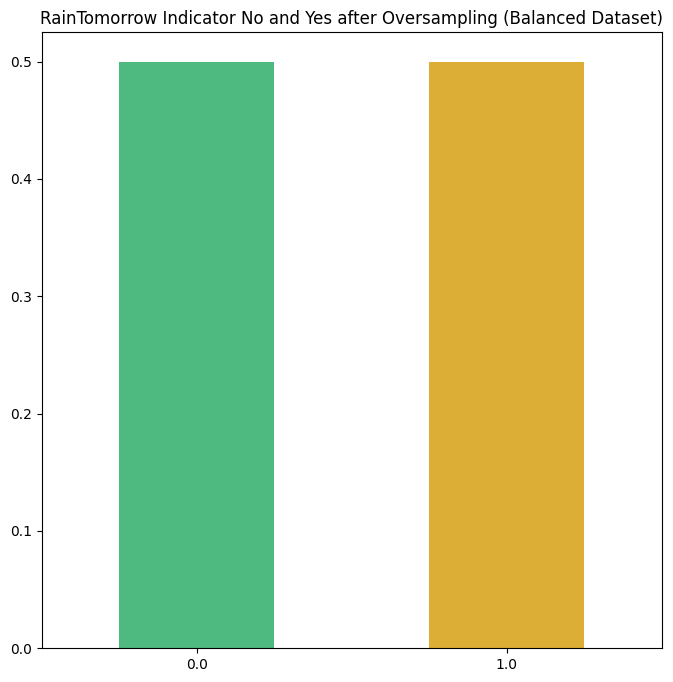

In [642]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,8))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['MediumSeaGreen','Goldenrod'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No and Yes after Oversampling (Balanced Dataset)')
plt.show()

In [643]:
oversampled.RainTomorrow.value_counts()

0.0    37364
1.0    37364
Name: RainTomorrow, dtype: int64

### Βροχή ανά περιοχή

In [644]:
rain_by_location = oversampled.groupby(by='Location').sum()
rain_by_location = rain_by_location[['RainToday']]
rain_by_location

C:\Users\giank\AppData\Local\Temp\ipykernel_30432\4169565387.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rain_by_location = oversampled.groupby(by='Location').sum()


,RainToday
Location,
Adelaide,550.0
Albany,719.0
Albury,511.0
AliceSprings,110.0
BadgerysCreek,361.0
Ballarat,724.0
Bendigo,355.0
Brisbane,442.0
Cairns,697.0


C:\Users\giank\AppData\Local\Temp\ipykernel_30432\2693593625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RainToday',


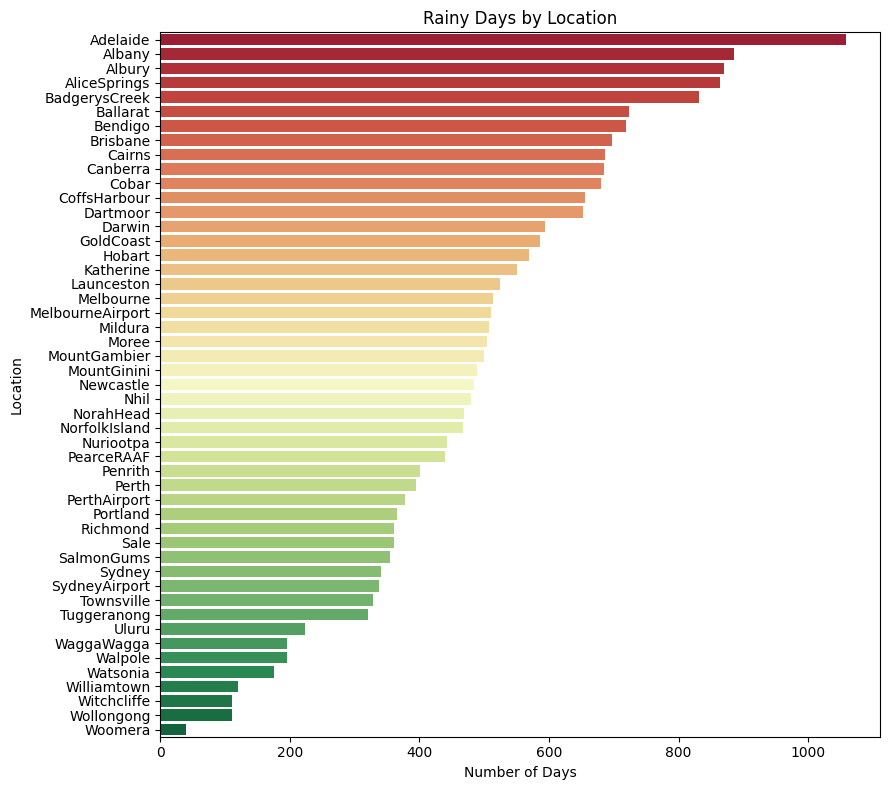

In [645]:
plt.figure(figsize=(9,8))
sns.barplot(x='RainToday', 
            y=rain_by_location.index, 
            data=rain_by_location.sort_values('RainToday', ascending=False), 
            orient='h',
            palette='RdYlGn'
           )
plt.xlabel('Number of Days')
plt.title('Rainy Days by Location')
plt.tight_layout();

### Συσχέτιση μέγιστης και ελάχιστης θερμοκρασίας με την βροχόπτωση σήμερα

### Διεύθυνση Ανέμου

In [646]:
print("Unique wind gust directions and their counts :")
windgustdir = oversampled["WindGustDir"].value_counts()
windgustdir = windgustdir.reset_index()
windgustdir.columns= ["Wind Gust Direction", "Counts"]
print(windgustdir)

Unique wind gust directions and their counts :
   Wind Gust Direction  Counts
0                    W    5923
1                    N    5703
2                   NW    5087
3                  WNW    5051
4                  WSW    4892
5                   SW    4748
6                    S    4397
7                  SSW    4273
8                  NNW    4165
9                   SE    3971
10                 SSE    3966
11                   E    3835
12                 NNE    3637
13                 ENE    3351
14                  NE    3316
15                 ESE    3268


### Διαχείριση outliers

In [647]:
IQR = oversampled.Rainfall.quantile(0.75) - oversampled.Rainfall.quantile(0.25)
Lower_fence = oversampled.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = oversampled.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -7.199999999999999 or > 9.6


In [648]:
IQR = oversampled.Evaporation.quantile(0.75) - oversampled.Evaporation.quantile(0.25)
Lower_fence = oversampled.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = oversampled.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -9.399999999999999 or > 17.2


In [649]:
IQR = oversampled.WindSpeed9am.quantile(0.75) - oversampled.WindSpeed9am.quantile(0.25)
Lower_fence = oversampled.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = oversampled.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -32.0 or > 59.0


In [650]:
IQR = oversampled.WindSpeed3pm.quantile(0.75) - oversampled.WindSpeed3pm.quantile(0.25)
Lower_fence = oversampled.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = oversampled.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


In [651]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in oversampled:
    oversampled['Rainfall'] = max_value(oversampled, 'Rainfall', 3.2)
    oversampled['Evaporation'] = max_value(oversampled, 'Evaporation', 21.8)
    oversampled['WindSpeed9am'] = max_value(oversampled, 'WindSpeed9am', 55)
    oversampled['WindSpeed3pm'] = max_value(oversampled, 'WindSpeed3pm', 57)

In [652]:
oversampled

,id,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,Albury,13.8,22.1,0.2,NaN,NaN,WNW,57.0,W,...,1013.1,NaN,NaN,15.6,21.9,0.0,0.0,2009,3,4
1,2,Albury,11.5,22.0,0.0,NaN,NaN,SW,50.0,WSW,...,1011.8,NaN,NaN,13.9,21.4,0.0,0.0,2009,3,5
2,3,Albury,13.8,31.8,0.0,NaN,NaN,NNE,24.0,SSE,...,1015.9,NaN,NaN,18.6,30.5,0.0,0.0,2009,3,9
4,5,Albury,18.4,30.5,1.2,NaN,NaN,NE,44.0,NE,...,1018.0,NaN,NaN,21.5,29.6,1.0,0.0,2009,3,11
8,9,Albury,8.4,25.3,0.0,NaN,NaN,WNW,35.0,SSE,...,1013.2,NaN,NaN,12.1,23.9,0.0,0.0,2009,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25120,25121,Portland,8.6,12.7,0.2,4.6,5.3,WSW,67.0,SSW,...,1023.6,7.0,6.0,9.8,12.4,0.0,1.0,2011,9,23
17310,17311,MountGinini,-2.5,4.0,0.0,NaN,NaN,NW,37.0,N,...,NaN,NaN,NaN,-1.3,1.0,0.0,1.0,2010,8,23
14218,14219,Wollongong,15.6,17.0,3.2,NaN,NaN,SSW,56.0,SSW,...,1014.7,8.0,8.0,16.1,16.5,1.0,1.0,2010,11,29
24328,24329,Nhil,10.7,12.4,0.4,NaN,NaN,SW,17.0,NaN,...,1025.8,NaN,NaN,11.1,11.6,0.0,1.0,2013,9,6


In [653]:
# columns_to_process = [col for col in df.columns if col not in ['Date', 'Location', 'id', 'Rainfall', 'RainToday', 'RainTomorrow']]

# for column in columns_to_process:
#     if df[column].dtype == 'float64' or df[column].dtype == 'int64':
#         #Calculate the initial mean of the column
#         initial_mean = df[column].mean()

#         #Create a new column to store the updated mean value
#         df[column + '_UpdatedMean'] = initial_mean

#         #Initialize a flag to check if the current row is a NaN value
#         is_previous_nan = False

#         #Iterate through the rows in the column
#         for i in range(len(df)):
#             if pd.isna(df.at[i, column]):
#                 #Fill NaN values with the updated mean
#                 df.at[i, column] = df.at[i, column + '_UpdatedMean']

#                 #If the previous row was also a NaN value, update
#                 if is_previous_nan:
#                     mean_value = df[column].mean()
#                     df.at[i, column + '_UpdatedMean'] = mean_value

#                 #Set the flag for the current row
#                 is_previous_nan = True
#             else:
#                 #Update the mean value for the next NaN cell
#                 mean_value = df[column].mean()
#                 df.at[i, column + '_UpdatedMean'] = mean_value
#                 is_previous_nan = False

# df = df[df.columns[~df.columns.str.endswith('_UpdatedMean')]]

# df.info()

In [654]:
numeric_df = df.select_dtypes(include=['float64'])#vazw mono tous arithmous pali
corr = numeric_df.corr()
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.715692,0.096510,0.457483,0.053477,0.163349,0.193476,0.183079,-0.232420,0.021193,-0.372295,-0.385832,0.071455,0.006876,0.892621,0.682041,0.065077,0.084001
MaxTemp,0.715692,1.000000,-0.103864,0.586798,0.469859,0.013580,0.003229,0.054409,-0.485241,-0.504320,-0.224734,-0.331614,-0.304386,-0.305659,0.881130,0.984609,-0.247060,-0.177480
Rainfall,0.096510,-0.103864,1.000000,-0.069284,-0.210261,0.160382,0.102262,0.068231,0.217506,0.258283,-0.178761,-0.125762,0.202290,0.162473,-0.007844,-0.108617,0.527639,0.244867
Evaporation,0.457483,0.586798,-0.069284,1.000000,0.351482,0.194751,0.208774,0.154487,-0.521304,-0.392778,-0.226294,-0.261228,-0.188185,-0.193911,0.556079,0.569842,-0.191368,-0.122146
Sunshine,0.053477,0.469859,-0.210261,0.351482,1.000000,-0.051283,-0.001514,0.055941,-0.471021,-0.634892,0.078309,0.010106,-0.693561,-0.708928,0.286368,0.492766,-0.314345,-0.437883
WindGustSpeed,0.163349,0.013580,0.160382,0.194751,-0.051283,1.000000,0.633542,0.715518,-0.214060,0.004057,-0.485376,-0.434426,0.086327,0.125622,0.123985,-0.024427,0.188300,0.258618
WindSpeed9am,0.193476,0.003229,0.102262,0.208774,-0.001514,0.633542,1.000000,0.541097,-0.289202,-0.019900,-0.266217,-0.212422,0.035081,0.066148,0.141875,-0.008063,0.121898,0.118477
WindSpeed3pm,0.183079,0.054409,0.068231,0.154487,0.055941,0.715518,0.541097,1.000000,-0.166434,-0.003281,-0.327326,-0.289712,0.048956,0.032267,0.169477,0.030884,0.097368,0.109116
Humidity9am,-0.232420,-0.485241,0.217506,-0.521304,-0.471021,-0.214060,-0.289202,-0.166434,1.000000,0.644709,0.117477,0.167571,0.439629,0.349397,-0.472335,-0.478217,0.332583,0.244048
Humidity3pm,0.021193,-0.504320,0.258283,-0.392778,-0.634892,0.004057,-0.019900,-0.003281,0.644709,1.000000,-0.063572,0.019297,0.518187,0.536139,-0.218612,-0.556450,0.375488,0.458234


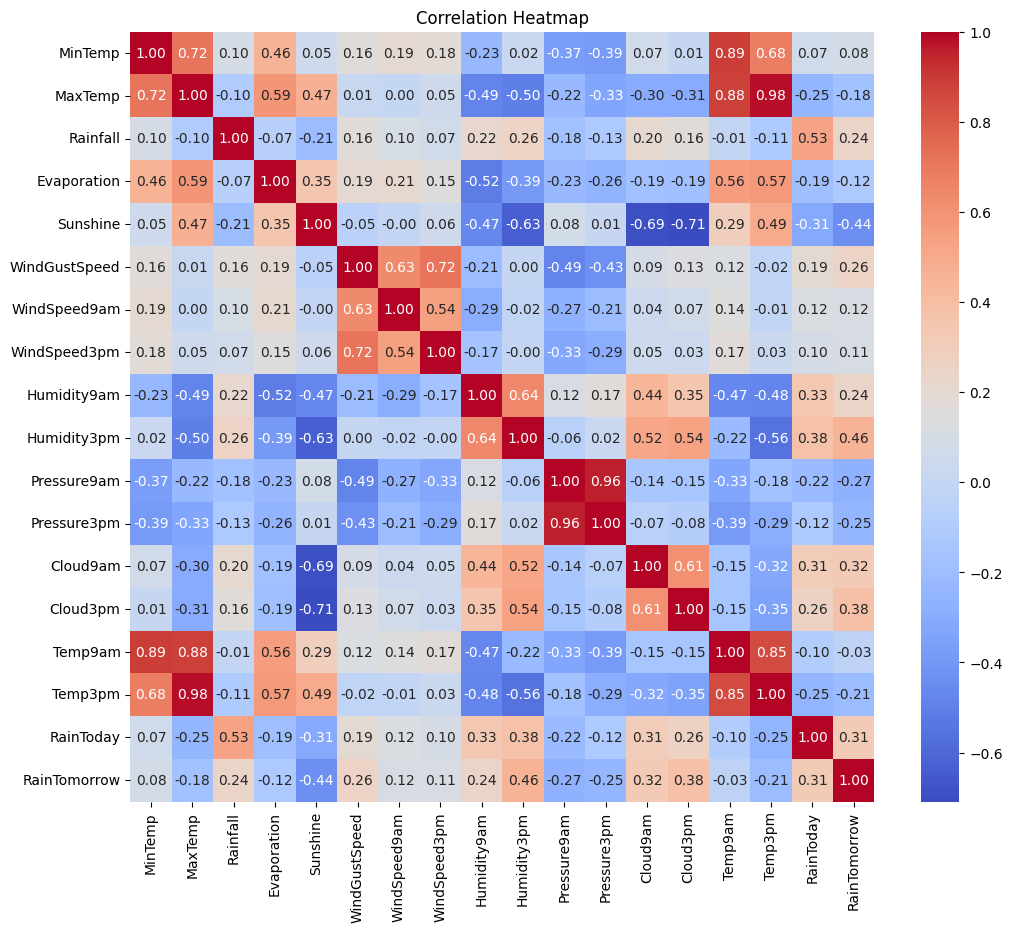

In [655]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Γεμίζω τα null values με **average** στα int και **most frequent** στα strings

In [656]:
# xwrizw ta columns se katigorikes metablites kai arithmitikes metablites
numeric_cols = df.select_dtypes(include=['float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# apo to SimpleImputer epilegw to average gia ta columns pou exoun arithmous
numeric_imputer = SimpleImputer(strategy='mean')

# Enw gia ta categorical to value me ta perissotera appearances
categorical_imputer = SimpleImputer(strategy='most_frequent')

# ta kanw apply sto df
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])


In [657]:
df.isnull().sum()


id               0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [658]:
df['WindSpeedMean'] = df[['WindSpeed9am', 'WindSpeed3pm']].mean(axis=1)

df.drop(columns=['WindSpeed9am', 'WindSpeed3pm'], inplace=True)

df = df.drop('id', axis=1)

numeric_df = df.select_dtypes(include=['float64'])#vazw mono tous arithmous pali
corr_matrix = numeric_df.corr()

In [659]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       48423 non-null  object 
 1   MinTemp        48423 non-null  float64
 2   MaxTemp        48423 non-null  float64
 3   Rainfall       48423 non-null  float64
 4   Evaporation    48423 non-null  float64
 5   Sunshine       48423 non-null  float64
 6   WindGustDir    48423 non-null  object 
 7   WindGustSpeed  48423 non-null  float64
 8   WindDir9am     48423 non-null  object 
 9   WindDir3pm     48423 non-null  object 
 10  Humidity9am    48423 non-null  float64
 11  Humidity3pm    48423 non-null  float64
 12  Pressure9am    48423 non-null  float64
 13  Pressure3pm    48423 non-null  float64
 14  Cloud9am       48423 non-null  float64
 15  Cloud3pm       48423 non-null  float64
 16  Temp9am        48423 non-null  float64
 17  Temp3pm        48423 non-null  float64
 18  RainTo

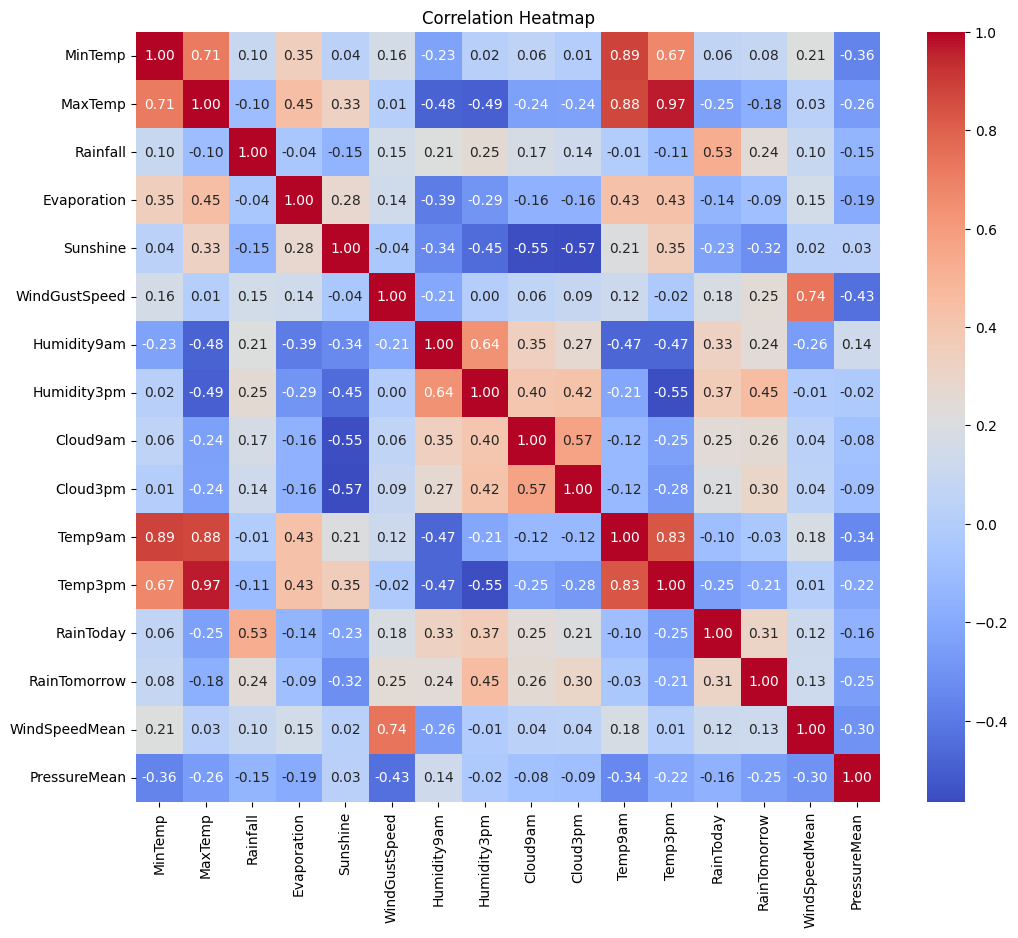

In [660]:
df['PressureMean'] = df[['Pressure9am', 'Pressure3pm']].mean(axis=1)

df.drop(columns=['Pressure9am', 'Pressure3pm'], inplace=True)

numeric_df = df.select_dtypes(include=['float64'])#vazw mono tous arithmous pali
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

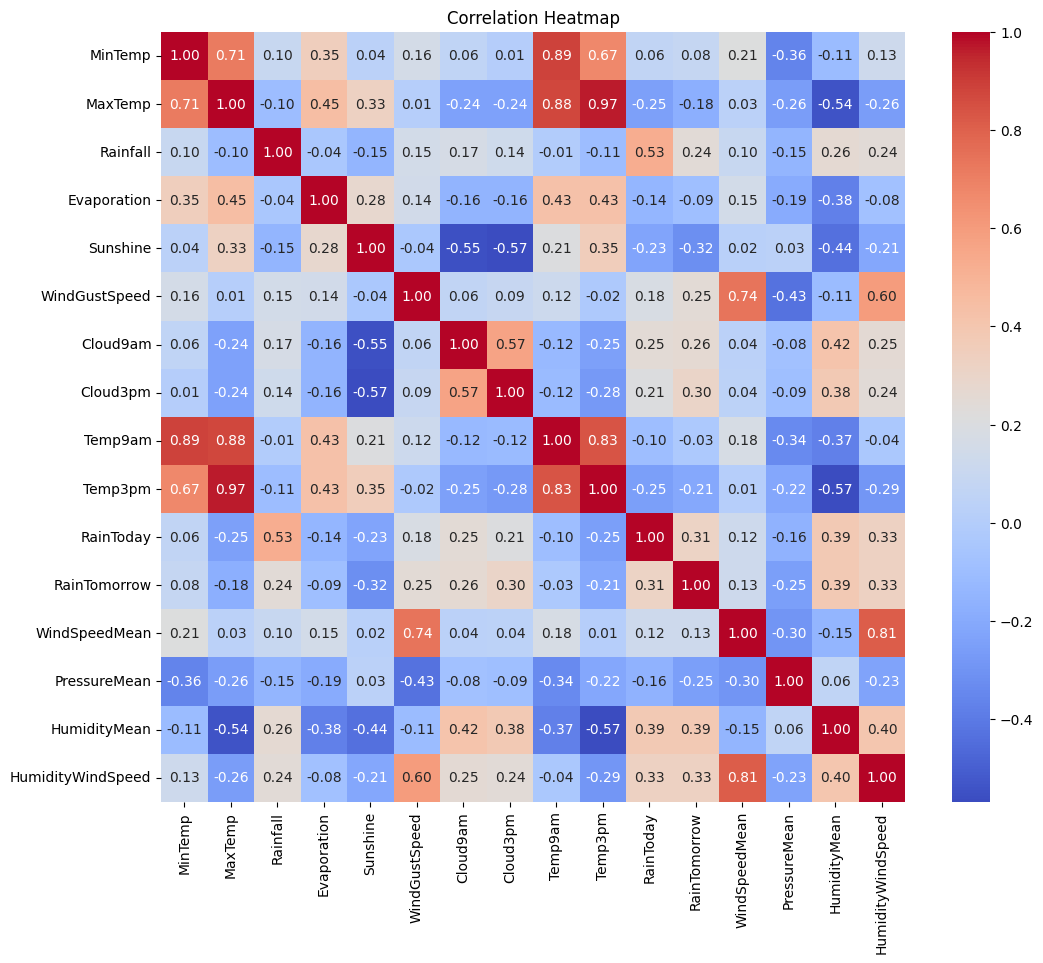

In [661]:
df['HumidityMean'] = (df['Humidity9am']+df['Humidity3pm'])/2
df['HumidityWindSpeed'] = df['HumidityMean']*df['WindSpeedMean']

df.drop(columns=['Humidity9am', 'Humidity3pm'], inplace=True)

numeric_df = df.select_dtypes(include=['float64'])#vazw mono tous arithmous pali
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

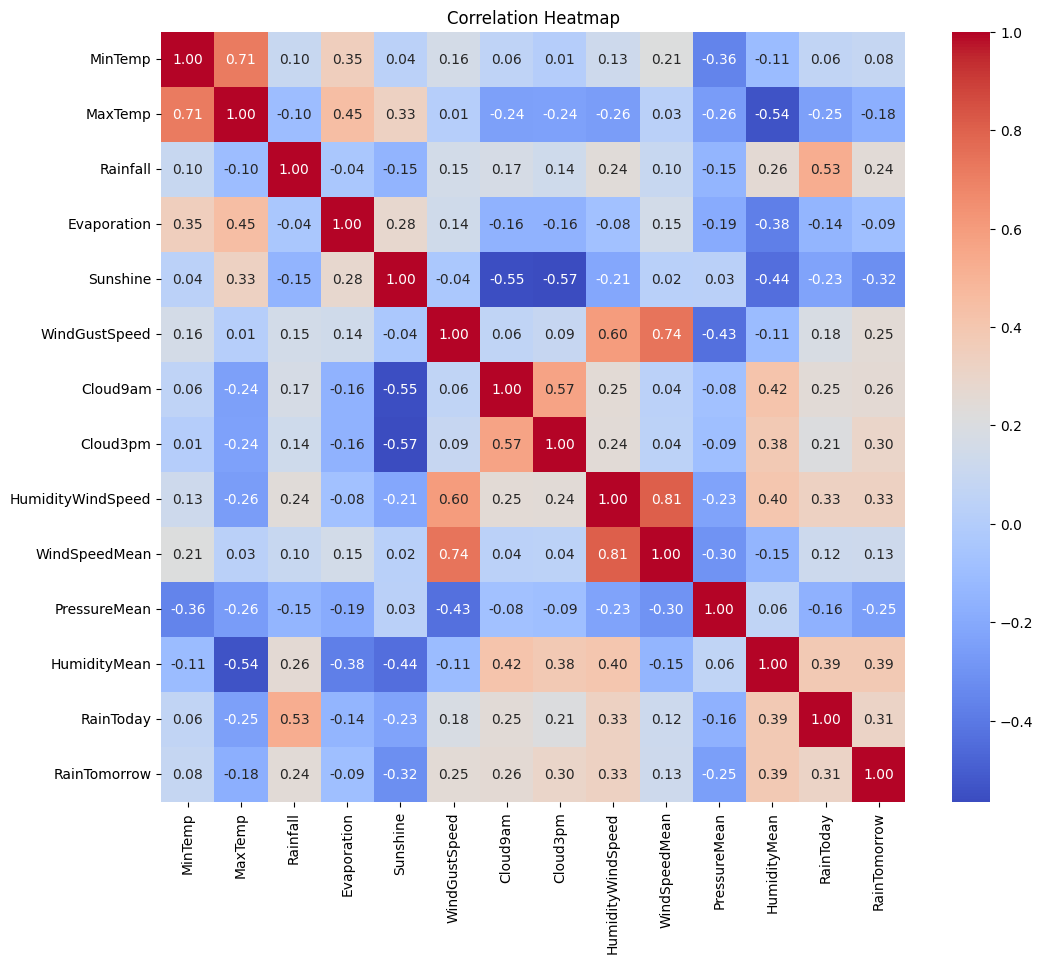

In [662]:
df['TempRange'] = df['Temp3pm']-df['Temp9am']
df.drop(columns=['Temp9am', 'Temp3pm'], inplace=True)

reordered_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Cloud9am', 'Cloud3pm', 'HumidityWindSpeed', 'WindSpeedMean', 'PressureMean','HumidityMean', 'RainToday', 'RainTomorrow']
corr_matrix = corr_matrix.reindex(index=reordered_columns, columns=reordered_columns)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας;


In [663]:
df.duplicated().sum()

0

3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

##### Στη συνέχεια θα κάνουμε oversampling έτσι, ώστε να αντιμετωπίσουμε το γεγονός ότι τα δεδομένα μας είναι unbalanced.

In [664]:
oversampled

,id,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,Albury,13.8,22.1,0.2,NaN,NaN,WNW,57.0,W,...,1013.1,NaN,NaN,15.6,21.9,0.0,0.0,2009,3,4
1,2,Albury,11.5,22.0,0.0,NaN,NaN,SW,50.0,WSW,...,1011.8,NaN,NaN,13.9,21.4,0.0,0.0,2009,3,5
2,3,Albury,13.8,31.8,0.0,NaN,NaN,NNE,24.0,SSE,...,1015.9,NaN,NaN,18.6,30.5,0.0,0.0,2009,3,9
4,5,Albury,18.4,30.5,1.2,NaN,NaN,NE,44.0,NE,...,1018.0,NaN,NaN,21.5,29.6,1.0,0.0,2009,3,11
8,9,Albury,8.4,25.3,0.0,NaN,NaN,WNW,35.0,SSE,...,1013.2,NaN,NaN,12.1,23.9,0.0,0.0,2009,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25120,25121,Portland,8.6,12.7,0.2,4.6,5.3,WSW,67.0,SSW,...,1023.6,7.0,6.0,9.8,12.4,0.0,1.0,2011,9,23
17310,17311,MountGinini,-2.5,4.0,0.0,NaN,NaN,NW,37.0,N,...,NaN,NaN,NaN,-1.3,1.0,0.0,1.0,2010,8,23
14218,14219,Wollongong,15.6,17.0,3.2,NaN,NaN,SSW,56.0,SSW,...,1014.7,8.0,8.0,16.1,16.5,1.0,1.0,2010,11,29
24328,24329,Nhil,10.7,12.4,0.4,NaN,NaN,SW,17.0,NaN,...,1025.8,NaN,NaN,11.1,11.6,0.0,1.0,2013,9,6


In [665]:
oversampled.head()
oversampled.info()
oversampled.dropna(subset=['Evaporation', 'Sunshine','Cloud9am','Cloud3pm'],inplace = True)
oversampled.info()
oversampled['Humidity9am'] = oversampled['Humidity9am'].fillna(method= "ffill")
oversampled['Humidity3pm'] = oversampled['Humidity3pm'].fillna(method= "ffill")
oversampled['Pressure9am'] = oversampled['Pressure9am'].fillna(method= "ffill")
oversampled['Pressure3pm'] = oversampled['Pressure3pm'].fillna(method= "ffill")
oversampled['Temp3pm'] = oversampled['Temp3pm'].fillna(method= "bfill")
oversampled['WindSpeed3pm'] = oversampled['WindSpeed3pm'].fillna(method= "bfill")
oversampled['MaxTemp'] = oversampled['MaxTemp'].fillna(method= "bfill")
oversampled['MinTemp'] = oversampled['MinTemp'].fillna(method= "bfill")
oversampled['Temp9am'] = oversampled['Temp9am'].fillna(method= "bfill")
oversampled['Rainfall'] = oversampled['Rainfall'].fillna(method= "bfill") 
oversampled['WindSpeed9am'] = oversampled['WindSpeed9am'].fillna(method= "bfill")
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])
oversampled['RainToday'] = oversampled['RainToday'].fillna(oversampled['RainToday'].mode()[0])
oversampled['WindGustSpeed'] = oversampled['WindGustSpeed'].fillna(oversampled['WindGustSpeed'].mode()[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74728 entries, 0 to 11276
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             74728 non-null  int64  
 1   Location       74728 non-null  object 
 2   MinTemp        74469 non-null  float64
 3   MaxTemp        74576 non-null  float64
 4   Rainfall       74728 non-null  float64
 5   Evaporation    42725 non-null  float64
 6   Sunshine       39206 non-null  float64
 7   WindGustDir    69583 non-null  object 
 8   WindGustSpeed  69629 non-null  float64
 9   WindDir9am     69238 non-null  object 
 10  WindDir3pm     72517 non-null  object 
 11  WindSpeed9am   74193 non-null  float64
 12  WindSpeed3pm   73320 non-null  float64
 13  Humidity9am    73804 non-null  float64
 14  Humidity3pm    72685 non-null  float64
 15  Pressure9am    67394 non-null  float64
 16  Pressure3pm    67362 non-null  float64
 17  Cloud9am       47609 non-null  float64
 18  Cloud3

In [666]:
oversampled.drop(['id'], axis = 1,inplace=True) 


In [667]:
oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33037 entries, 1966 to 11276
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       33037 non-null  object 
 1   MinTemp        33037 non-null  float64
 2   MaxTemp        33037 non-null  float64
 3   Rainfall       33037 non-null  float64
 4   Evaporation    33037 non-null  float64
 5   Sunshine       33037 non-null  float64
 6   WindGustDir    33037 non-null  object 
 7   WindGustSpeed  33037 non-null  float64
 8   WindDir9am     33037 non-null  object 
 9   WindDir3pm     33037 non-null  object 
 10  WindSpeed9am   33037 non-null  float64
 11  WindSpeed3pm   33037 non-null  float64
 12  Humidity9am    33037 non-null  float64
 13  Humidity3pm    33037 non-null  float64
 14  Pressure9am    33037 non-null  float64
 15  Pressure3pm    33037 non-null  float64
 16  Cloud9am       33037 non-null  float64
 17  Cloud3pm       33037 non-null  float64
 18  Tem

3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

In [668]:
from sklearn.preprocessing import LabelEncoder

In [669]:
le=LabelEncoder
Location_le=LabelEncoder()
oversampled['Location']=Location_le.fit_transform(oversampled['Location'])
WindGustDir_le=LabelEncoder()
oversampled['WindGustDir']=WindGustDir_le.fit_transform(oversampled['WindGustDir'])
WindDir9am_le=LabelEncoder()
oversampled['WindDir9am']=WindDir9am_le.fit_transform(oversampled['WindDir9am'])
WindDir3pm_le=LabelEncoder()
oversampled['WindDir3pm']=WindDir3pm_le.fit_transform(oversampled['WindDir3pm'])

In [670]:
oversampled.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [671]:
oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33037 entries, 1966 to 11276
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       33037 non-null  int32  
 1   MinTemp        33037 non-null  float64
 2   MaxTemp        33037 non-null  float64
 3   Rainfall       33037 non-null  float64
 4   Evaporation    33037 non-null  float64
 5   Sunshine       33037 non-null  float64
 6   WindGustDir    33037 non-null  int32  
 7   WindGustSpeed  33037 non-null  float64
 8   WindDir9am     33037 non-null  int32  
 9   WindDir3pm     33037 non-null  int32  
 10  WindSpeed9am   33037 non-null  float64
 11  WindSpeed3pm   33037 non-null  float64
 12  Humidity9am    33037 non-null  float64
 13  Humidity3pm    33037 non-null  float64
 14  Pressure9am    33037 non-null  float64
 15  Pressure3pm    33037 non-null  float64
 16  Cloud9am       33037 non-null  float64
 17  Cloud3pm       33037 non-null  float64
 18  Tem

In [672]:
oversampled['WindSpeedMean'] = oversampled[['WindSpeed9am', 'WindSpeed3pm']].mean(axis=1)

oversampled.drop(columns=['WindSpeed9am', 'WindSpeed3pm'], inplace=True)

oversampled['PressureMean'] = oversampled[['Pressure9am', 'Pressure3pm']].mean(axis=1)

oversampled.drop(columns=['Pressure9am', 'Pressure3pm'], inplace=True)

oversampled['TempRange'] = oversampled['Temp3pm']-oversampled['Temp9am']
oversampled.drop(columns=['Temp9am', 'Temp3pm'], inplace=True)

oversampled['WindDirCombined'] = oversampled['WindDir9am'].fillna('') + oversampled['WindDir3pm'].fillna('')
#oversampled['WindDirCombined'] = oversampled['WindDirCombined'].apply(lambda x: ''.join(sorted(set(x))))
oversampled['AvgHumidity'] = (oversampled['Humidity9am'] + oversampled['Humidity3pm']) / 2
oversampled['AvgCloud'] = (oversampled['Cloud9am'] + oversampled['Cloud3pm']) / 2


In [673]:
train_test['WindDirCombined'] = train_test['WindDir9am'].fillna('') + train_test['WindDir3pm'].fillna('')
train_test['WindDirCombined'] = train_test['WindDirCombined'].apply(lambda x: ''.join(sorted(set(x))))


train_test['WindSpeedMean'] = (train_test['WindSpeed9am'] + train_test['WindSpeed3pm']) / 2
train_test['AvgHumidity'] = (train_test['Humidity9am'] + train_test['Humidity3pm']) / 2
train_test['PressureMean'] = (train_test['Pressure9am'] + train_test['Pressure3pm']) / 2
train_test['AvgCloud'] = (train_test['Cloud9am'] + train_test['Cloud3pm']) / 2
train_test['TempRange'] = train_test['Temp3pm']-train_test['Temp9am']

# Ta parapanw einai AKRIVOS idia methodos me to df pou egine parapanw
train_test.drop(['WindDir9am','WindDir3pm','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], axis=1, inplace=True)
train_test['Date'] = pd.to_datetime(train_test['Date'])
train_test['year'] = train_test['Date'].dt.year
train_test['month'] = train_test['Date'].dt.month
train_test['day'] = train_test['Date'].dt.day
train_test.drop(['Date'], axis = 1,inplace=True) 
train_test.head()

C:\Users\giank\AppData\Local\Temp\ipykernel_30432\1579721895.py:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_test['Date'] = pd.to_datetime(train_test['Date'])


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,RainToday,WindDirCombined,WindSpeedMean,AvgHumidity,PressureMean,AvgCloud,TempRange,year,month,day
0,Albury,14.6,30.0,0.0,NaN,NaN,NE,37.0,0,EN,11.5,43.0,1013.75,2.0,10.9,2009,3,22
1,Albury,10.7,21.9,0.0,NaN,NaN,W,63.0,0,NW,28.5,35.5,1009.00,NaN,-1.6,2009,4,15
2,Albury,5.7,21.4,0.0,NaN,NaN,ESE,17.0,0,ENS,6.5,53.5,1023.05,NaN,8.7,2009,4,21
3,Albury,10.6,16.2,0.0,NaN,NaN,WNW,39.0,0,ENS,5.5,80.0,1005.65,8.0,0.2,2009,4,24
4,Albury,3.7,19.1,0.0,NaN,NaN,SSE,19.0,0,ES,5.5,69.0,1021.75,NaN,11.5,2009,5,19


In [674]:
oversampled.drop(['WindDir9am','WindDir3pm','Cloud9am', 'Cloud3pm',], axis=1, inplace=True)

In [675]:
oversampled.info()
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33037 entries, 1966 to 11276
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         33037 non-null  int32  
 1   MinTemp          33037 non-null  float64
 2   MaxTemp          33037 non-null  float64
 3   Rainfall         33037 non-null  float64
 4   Evaporation      33037 non-null  float64
 5   Sunshine         33037 non-null  float64
 6   WindGustDir      33037 non-null  int32  
 7   WindGustSpeed    33037 non-null  float64
 8   Humidity9am      33037 non-null  float64
 9   Humidity3pm      33037 non-null  float64
 10  RainToday        33037 non-null  float64
 11  RainTomorrow     33037 non-null  float64
 12  year             33037 non-null  int64  
 13  month            33037 non-null  int64  
 14  day              33037 non-null  int64  
 15  WindSpeedMean    33037 non-null  float64
 16  PressureMean     33037 non-null  float64
 17  TempRange

In [676]:
oversampled.drop(['Humidity9am','Humidity3pm'], axis=1, inplace=True)

In [695]:
X = oversampled.drop('RainTomorrow', axis= 1).values 
y = oversampled['RainTomorrow'].values

In [678]:
from sklearn.model_selection import train_test_split


##### Διαχωρίζουμε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) σε ποσοστό 70-30.

In [679]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [680]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας:
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


# Naive-Bayes Classifier

In [382]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Με default τιμες

In [383]:
from sklearn.naive_bayes import GaussianNB
classifier_nbc = GaussianNB()
classifier_nbc.fit(X_train, y_train)
y_pred_nbc = classifier_nbc.predict(X_test)
print(classification_report(y_test, y_pred_nbc))
f1_nbc = f1_score(y_test,y_pred_nbc, average = 'weighted',labels=np.unique(y_pred_nbc))
print('Naive Bayes f1_score : ', f1_nbc)

              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76      5015
         1.0       0.75      0.76      0.75      4897

    accuracy                           0.76      9912
   macro avg       0.76      0.76      0.76      9912
weighted avg       0.76      0.76      0.76      9912

Naive Bayes f1_score :  0.7565615365067299


### Με hyperparametring τιμές

In [384]:
nbc = GaussianNB()

# Hyperparameter Optimization
parameters = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
# Run the grid search
grid_obj = GridSearchCV(nbc, parameters, cv=5, scoring='f1', verbose=10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
nbc = grid_obj.best_estimator_

# Train the model using the training sets 
nbc.fit(X_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5; 1/14] START var_smoothing=0.01.........................................
[CV 1/5; 1/14] END ..........var_smoothing=0.01;, score=0.759 total time=   0.0s
[CV 2/5; 1/14] START var_smoothing=0.01.........................................
[CV 2/5; 1/14] END ..........var_smoothing=0.01;, score=0.765 total time=   0.0s
[CV 3/5; 1/14] START var_smoothing=0.01.........................................
[CV 3/5; 1/14] END ..........var_smoothing=0.01;, score=0.769 total time=   0.0s
[CV 4/5; 1/14] START var_smoothing=0.01.........................................
[CV 4/5; 1/14] END ..........var_smoothing=0.01;, score=0.761 total time=   0.0s
[CV 5/5; 1/14] START var_smoothing=0.01.........................................
[CV 5/5; 1/14] END ..........var_smoothing=0.01;, score=0.770 total time=   0.0s
[CV 1/5; 2/14] START var_smoothing=0.001........................................
[CV 1/5; 2/14] END .........var_smoothing=0.001;

GaussianNB(var_smoothing=0.01)

In [385]:
y_pred = nbc.predict(X_test)
f1_nbc_hyp = f1_score(y_test,y_pred, average = 'weighted',labels=np.unique(y_pred))
print('F1 Score of NBC model : ', f1_nbc_hyp)

F1 Score of NBC model :  0.7668397808426416


# ΚΝΝ Classifier

In [681]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [682]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Με default τιμές

In [683]:
from sklearn.neighbors import KNeighborsClassifier

classifier_kNN = KNeighborsClassifier(n_neighbors=5)
classifier_kNN.fit(X_train, y_train)
y_pred_kNN = classifier_kNN.predict(X_test)
# compute the classification report
print(classification_report(y_test, y_pred_kNN))
f1_kNN = f1_score(y_test,y_pred_kNN, average = 'weighted',labels=np.unique(y_pred_kNN))
print('KNN f1_score : ', f1_kNN)

              precision    recall  f1-score   support

         0.0       0.87      0.77      0.81      5015
         1.0       0.79      0.88      0.83      4897

    accuracy                           0.82      9912
   macro avg       0.83      0.82      0.82      9912
weighted avg       0.83      0.82      0.82      9912

KNN f1_score :  0.8232112480867512


### Hyperparameter Tuning

In [684]:
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [1, 5, 8, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = RandomizedSearchCV(knn, parameters, cv=5 , n_iter = 15, scoring='f1', verbose=10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START algorithm=ball_tree, leaf_size=30, n_neighbors=5, weights=uniform
[CV 1/5; 1/15] END algorithm=ball_tree, leaf_size=30, n_neighbors=5, weights=uniform;, score=0.805 total time=   7.4s
[CV 2/5; 1/15] START algorithm=ball_tree, leaf_size=30, n_neighbors=5, weights=uniform
[CV 2/5; 1/15] END algorithm=ball_tree, leaf_size=30, n_neighbors=5, weights=uniform;, score=0.809 total time=  10.3s
[CV 3/5; 1/15] START algorithm=ball_tree, leaf_size=30, n_neighbors=5, weights=uniform
[CV 3/5; 1/15] END algorithm=ball_tree, leaf_size=30, n_neighbors=5, weights=uniform;, score=0.816 total time=   8.5s
[CV 4/5; 1/15] START algorithm=ball_tree, leaf_size=30, n_neighbors=5, weights=uniform
[CV 4/5; 1/15] END algorithm=ball_tree, leaf_size=30, n_neighbors=5, weights=uniform;, score=0.813 total time=   4.3s
[CV 5/5; 1/15] START algorithm=ball_tree, leaf_size=30, n_neighbors=5, weights=uniform
[CV 5/5; 1/15] END algorithm=bal

KNeighborsClassifier(algorithm='brute', n_neighbors=1, weights='distance')

In [685]:
y_pred = knn.predict(X_test)
f1_kNN_hyp = f1_score(y_test,y_pred, average = 'weighted',labels=np.unique(y_pred))
print('F1 Score of kNN model : ', f1_kNN_hyp)

F1 Score of kNN model :  0.9029913011619861


# Logistic Regression

In [386]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### default

In [387]:
from sklearn.linear_model import LogisticRegression
classifier_reg = LogisticRegression()
classifier_reg.fit(X_train, y_train)
y_pred_reg = classifier_reg.predict(X_test)
print(classification_report(y_test, y_pred_reg))
f1_reg = f1_score(y_test,y_pred_reg, average = 'weighted',labels=np.unique(y_pred_reg))
print('Logistic Regression f1_score : ', f1_reg)

              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      5015
         1.0       0.79      0.78      0.78      4897

    accuracy                           0.79      9912
   macro avg       0.79      0.79      0.79      9912
weighted avg       0.79      0.79      0.79      9912

Logistic Regression f1_score :  0.7863049933598912


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Hyperparameter

In [388]:
reg = LogisticRegression()

parameters = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

grid_obj =RandomizedSearchCV(reg, parameters, cv=3,n_iter=15 ,scoring='f1', verbose=10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
reg = grid_obj.best_estimator_

# Train the model using the training sets 
reg.fit(X_train,y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3; 1/15] START C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs
[CV 1/3; 1/15] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3; 1/15] START C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs
[CV 2/3; 1/15] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3; 1/15] START C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs
[CV 3/3; 1/15] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3; 2/15] START C=4.281332398719396, max_iter=100, penalty=none, solver=liblinear
[CV 1/3; 2/15] END C=4.281332398719396, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3; 2/15] START C=4.281332398719396, max_iter=100, penalty=none, solver=liblinear
[CV 2/3; 2/15] END C=4.281332398719396, max_iter=100, pena

c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\giank\AppData\Local\Programs\Python\P

[CV 1/3; 8/15] END C=206.913808111479, max_iter=100, penalty=none, solver=newton-cg;, score=0.779 total time=   2.0s
[CV 2/3; 8/15] START C=206.913808111479, max_iter=100, penalty=none, solver=newton-cg


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: 

[CV 2/3; 8/15] END C=206.913808111479, max_iter=100, penalty=none, solver=newton-cg;, score=0.782 total time=   1.5s
[CV 3/3; 8/15] START C=206.913808111479, max_iter=100, penalty=none, solver=newton-cg


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: 

[CV 3/3; 8/15] END C=206.913808111479, max_iter=100, penalty=none, solver=newton-cg;, score=0.783 total time=   1.5s
[CV 1/3; 9/15] START C=206.913808111479, max_iter=100, penalty=l1, solver=sag...
[CV 1/3; 9/15] END C=206.913808111479, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/3; 9/15] START C=206.913808111479, max_iter=100, penalty=l1, solver=sag...
[CV 2/3; 9/15] END C=206.913808111479, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/3; 9/15] START C=206.913808111479, max_iter=100, penalty=l1, solver=sag...
[CV 3/3; 9/15] END C=206.913808111479, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/3; 10/15] START C=0.08858667904100823, max_iter=2500, penalty=none, solver=sag
[CV 1/3; 10/15] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=sag;, score=0.778 total time=   9.3s
[CV 2/3; 10/15] START C=0.08858667904100823, max_iter=2500, penalty=none, solver=sag


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 10/15] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=sag;, score=0.784 total time=   8.6s
[CV 3/3; 10/15] START C=0.08858667904100823, max_iter=2500, penalty=none, solver=sag


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 10/15] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=sag;, score=0.782 total time=   9.3s
[CV 1/3; 11/15] START C=10000.0, max_iter=100, penalty=l1, solver=saga..........


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 11/15] END C=10000.0, max_iter=100, penalty=l1, solver=saga;, score=0.777 total time=   0.8s
[CV 2/3; 11/15] START C=10000.0, max_iter=100, penalty=l1, solver=saga..........


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 11/15] END C=10000.0, max_iter=100, penalty=l1, solver=saga;, score=0.781 total time=   0.7s
[CV 3/3; 11/15] START C=10000.0, max_iter=100, penalty=l1, solver=saga..........


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 11/15] END C=10000.0, max_iter=100, penalty=l1, solver=saga;, score=0.781 total time=   0.7s
[CV 1/3; 12/15] START C=545.5594781168514, max_iter=1000, penalty=l1, solver=newton-cg
[CV 1/3; 12/15] END C=545.5594781168514, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3; 12/15] START C=545.5594781168514, max_iter=1000, penalty=l1, solver=newton-cg
[CV 2/3; 12/15] END C=545.5594781168514, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3; 12/15] START C=545.5594781168514, max_iter=1000, penalty=l1, solver=newton-cg
[CV 3/3; 12/15] END C=545.5594781168514, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3; 13/15] START C=0.0018329807108324356, max_iter=2500, penalty=none, solver=newton-cg


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: 

[CV 1/3; 13/15] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=newton-cg;, score=0.779 total time=   1.4s
[CV 2/3; 13/15] START C=0.0018329807108324356, max_iter=2500, penalty=none, solver=newton-cg


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: 

[CV 2/3; 13/15] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=newton-cg;, score=0.782 total time=   1.6s
[CV 3/3; 13/15] START C=0.0018329807108324356, max_iter=2500, penalty=none, solver=newton-cg


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/3; 13/15] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=newton-cg;, score=0.783 total time=   3.1s
[CV 1/3; 14/15] START C=78.47599703514607, max_iter=1000, penalty=l2, solver=saga


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 14/15] END C=78.47599703514607, max_iter=1000, penalty=l2, solver=saga;, score=0.778 total time=   6.1s
[CV 2/3; 14/15] START C=78.47599703514607, max_iter=1000, penalty=l2, solver=saga


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 14/15] END C=78.47599703514607, max_iter=1000, penalty=l2, solver=saga;, score=0.784 total time=   7.8s
[CV 3/3; 14/15] START C=78.47599703514607, max_iter=1000, penalty=l2, solver=saga


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
27 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\giank\AppData\Local\Progra

[CV 3/3; 14/15] END C=78.47599703514607, max_iter=1000, penalty=l2, solver=saga;, score=0.783 total time=   6.7s
[CV 1/3; 15/15] START C=0.012742749857031334, max_iter=1000, penalty=l1, solver=lbfgs
[CV 1/3; 15/15] END C=0.012742749857031334, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3; 15/15] START C=0.012742749857031334, max_iter=1000, penalty=l1, solver=lbfgs
[CV 2/3; 15/15] END C=0.012742749857031334, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3; 15/15] START C=0.012742749857031334, max_iter=1000, penalty=l1, solver=lbfgs
[CV 3/3; 15/15] END C=0.012742749857031334, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=78.47599703514607, max_iter=1000, solver='saga')

In [389]:
y_pred = reg.predict(X_test)
f1_reg_hyp = f1_score(y_test,y_pred, average = 'weighted',labels=np.unique(y_pred))
print('F1 Score of Logistic Regression: ', f1_reg_hyp)

F1 Score of Logistic Regression:  0.7861746742741348


# MLP για ένα κρυφό επίπεδο

In [390]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### default

In [391]:
from sklearn.neural_network import MLPClassifier
classifier_mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5),activation = 'tanh', random_state=1)
classifier_mlp.fit(X_train, y_train)
y_pred_mlp = classifier_mlp.predict(X_test)
print(classification_report(y_test, y_pred_mlp))
f1_mlp = f1_score(y_test,y_pred_reg, average = 'weighted',labels=np.unique(y_pred_mlp))
print('MLP f1_score : ', f1_mlp)

              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80      5015
         1.0       0.80      0.79      0.79      4897

    accuracy                           0.80      9912
   macro avg       0.80      0.80      0.80      9912
weighted avg       0.80      0.80      0.80      9912

MLP f1_score :  0.7863049933598912


### Hyperparameter

In [392]:
mlp = MLPClassifier()

parameters = {
    'hidden_layer_sizes': [(300)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.05],
    'learning_rate': ['adaptive'],
}

grid_obj =GridSearchCV(mlp, parameters, cv=5,n_jobs=-1, scoring='f1', verbose=True)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
mlp = grid_obj.best_estimator_

# Train the model using the training sets 
mlp.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.05, hidden_layer_sizes=300, learning_rate='adaptive')

In [393]:
y_pred = mlp.predict(X_test)
f1_mlp_hyp = f1_score(y_test,y_pred, average = 'weighted',labels=np.unique(y_pred))
print('F1 Score of MLP: ', f1_mlp_hyp)

F1 Score of MLP:  0.8543097776202262


# SVC

In [394]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [395]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### default

In [396]:
from sklearn.svm import SVC
classifier_svc = SVC()
classifier_svc.fit(X_train, y_train)
y_pred_svc = classifier_svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))
f1_svc = f1_score(y_test,y_pred_reg, average = 'weighted',labels=np.unique(y_pred_svc))
print('SVC f1_score : ', f1_svc)

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82      5015
         1.0       0.82      0.82      0.82      4897

    accuracy                           0.82      9912
   macro avg       0.82      0.82      0.82      9912
weighted avg       0.82      0.82      0.82      9912

SVC f1_score :  0.7863049933598912


# Decision Tree

In [397]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [398]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### default

In [399]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier_dt.fit(X_train, y_train)
y_pred_dt = classifier_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))
f1_dt = f1_score(y_test,y_pred_reg, average = 'weighted',labels=np.unique(y_pred_dt))
print('Decision Tree f1_score : ', f1_dt)

              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88      5015
         1.0       0.85      0.94      0.89      4897

    accuracy                           0.89      9912
   macro avg       0.89      0.89      0.89      9912
weighted avg       0.89      0.89      0.89      9912

Decision Tree f1_score :  0.7863049933598912


### hyperparameter

In [400]:
dt = DecisionTreeClassifier()

# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_obj = RandomizedSearchCV(dt, parameters, cv=5,n_iter = 50 ,scoring='f1', verbose=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
dt = grid_obj.best_estimator_

# Train the model using the training sets 
dt.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2;, score=0.755 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2;, score=0.713 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2;, score=0.749 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2;, score=0.749 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2;, score=0.689 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=2;, score=0.755 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=2;, score=0.69

c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3;, score=0.698 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3;, score=0.715 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3;, score=0.738 total time=   0.0s


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3;, score=0.742 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=2;, score=0.819 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=2;, score=0.812 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=2;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=2;, score=0.817 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=2;, score=0.821 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=50, max_features=log2, min_samples_leaf=10, min_samples_split=50;, score=0.797 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=50, ma

c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1

[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=100;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=100;, score=0.783 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=100;, score=0.775 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=100;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=100;, score=0.773 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=100;, score=0.786 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=3;, score=0.783 total time=   0.0s
[CV 2/5] END criterion=gin

c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1

[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=50;, score=0.701 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=50;, score=0.756 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.746 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.737 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.761 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=

c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1

[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=50;, score=0.681 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=50;, score=0.744 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=50;, score=0.752 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=50;, score=0.749 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.775 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.749 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.766 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqr

c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1

[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.768 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=3;, score=0.762 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=3;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=3;, score=0.741 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=3;, score=0.747 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=3;, score=0.741 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2;, score=0.733 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth

c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1

[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=100;, score=0.716 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=100;, score=0.741 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=100;, score=0.739 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=100;, score=0.702 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=100;, score=0.744 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=3;, score=0.819 total time=   0.0s


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/5] END criterion=entropy, max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=3;, score=0.834 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=3;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=3;, score=0.828 total time=   0.0s


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 5/5] END criterion=entropy, max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=3;, score=0.825 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3;, score=0.653 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3;, score=0.702 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3;, score=0.763 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=10, min_samples_split=3;, score=0.703 total time=   0.0s
[CV 2/5] END criterion=entropy, max_dep

c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1

[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=50;, score=0.702 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=50;, score=0.746 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=3;, score=0.787 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=3;, score=0.794 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=3;, score=0.792 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=3;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=3;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=entropy, max

c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1

[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=100;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=100;, score=0.681 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=100;, score=0.592 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=100;, score=0.749 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=100;, score=0.674 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=3;, score=0.739 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=3;, score=0.777 total time=   0.0s
[CV 3/5] END criterion=gini, max_dept

c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1

[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=50;, score=0.786 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=50;, score=0.781 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=50;, score=0.795 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=50;, score=0.774 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=50;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=3;, score=0.786 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=3;, score=0.788 total time=   0.0s
[CV 3/5] END criterion=gini, max_de

c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1

[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=100;, score=0.628 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=100;, score=0.637 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=100;, score=0.752 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=100;, score=0.747 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=100;, score=0.688 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3;, score=0.761 total time=   0.0s
[CV 3/5] END criterion=entropy,

DecisionTreeClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                       min_samples_split=3)

In [401]:
y_pred = dt.predict(X_test)
f1_dt_hyp = f1_score(y_test,y_pred, average = 'weighted',labels=np.unique(y_pred))
print('F1 Score of Decision Tree: ', f1_dt_hyp)

F1 Score of Decision Tree:  0.8846251506071622


# Randon Forest

In [402]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [403]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### default

In [404]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier()
classifier_rf.fit(X_train, y_train)
y_pred_rf= classifier_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
f1_rf = f1_score(y_test,y_pred_reg, average = 'weighted',labels=np.unique(y_pred_rf))
print('Random Forest f1_score : ', f1_rf)

              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94      5015
         1.0       0.91      0.96      0.94      4897

    accuracy                           0.94      9912
   macro avg       0.94      0.94      0.94      9912
weighted avg       0.94      0.94      0.94      9912

Random Forest f1_score :  0.7863049933598912


### hyperparameter

In [405]:
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }
# Run the grid search
grid_obj = RandomizedSearchCV(rf, parameters, cv=5,n_iter = 8 ,scoring='f1', verbose=10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4
[CV 1/5; 1/8] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4;, score=0.748 total time=   0.0s
[CV 2/5; 1/8] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4
[CV 2/5; 1/8] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4;, score=0.749 total time=   0.0s
[CV 3/5; 1/8] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4
[CV 3/5; 1/8] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4;, score=0.744 total time=   0.0s
[CV 4/5; 1/8] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_spl

c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 4/8] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.757 total time=   0.1s
[CV 3/5; 4/8] START criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10
[CV 3/5; 4/8] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.769 total time=   0.0s
[CV 4/5; 4/8] START criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 4/8] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.773 total time=   0.1s
[CV 5/5; 4/8] START criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10
[CV 5/5; 4/8] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.766 total time=   0.0s
[CV 1/5; 5/8] START criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 5/8] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9;, score=0.758 total time=   0.1s
[CV 2/5; 5/8] START criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9
[CV 2/5; 5/8] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9;, score=0.758 total time=   0.0s
[CV 3/5; 5/8] START criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 5/8] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9;, score=0.764 total time=   0.1s
[CV 4/5; 5/8] START criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9
[CV 4/5; 5/8] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9;, score=0.775 total time=   0.0s
[CV 5/5; 5/8] START criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 5/8] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9;, score=0.768 total time=   0.0s
[CV 1/5; 6/8] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15
[CV 1/5; 6/8] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15;, score=0.749 total time=   0.1s
[CV 2/5; 6/8] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 6/8] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15;, score=0.753 total time=   0.1s
[CV 3/5; 6/8] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15
[CV 3/5; 6/8] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15;, score=0.763 total time=   0.1s
[CV 4/5; 6/8] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 6/8] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15;, score=0.765 total time=   0.1s
[CV 5/5; 6/8] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15
[CV 5/5; 6/8] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15;, score=0.769 total time=   0.1s
[CV 1/5; 7/8] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=4


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 7/8] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=4;, score=0.814 total time=   0.1s
[CV 2/5; 7/8] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=4
[CV 2/5; 7/8] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=4;, score=0.825 total time=   0.0s
[CV 3/5; 7/8] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=4


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 7/8] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=4;, score=0.821 total time=   0.1s
[CV 4/5; 7/8] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=4
[CV 4/5; 7/8] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=4;, score=0.828 total time=   0.0s
[CV 5/5; 7/8] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=4


c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\giank\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 7/8] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=4;, score=0.824 total time=   0.1s
[CV 1/5; 8/8] START criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=9
[CV 1/5; 8/8] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=9;, score=0.760 total time=   0.0s
[CV 2/5; 8/8] START criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=9
[CV 2/5; 8/8] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=9;, score=0.777 total time=   0.1s
[CV 3/5; 8/8] START criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=9
[CV 3/5; 8/8] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=9;, score=0.768 total ti

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=3,
                       n_estimators=10)

In [406]:
y_pred = rf.predict(X_test)
f1_rf_hyp = f1_score(y_test,y_pred, average = 'weighted',labels=np.unique(y_pred))
print('F1 Score of Decision Tree: ', f1_rf_hyp)

F1 Score of Decision Tree:  0.8469505351779979


# Σύγκριση Μοντέλων

In [407]:
models = pd.DataFrame({
    'Model': ['Naive Bayes', 'kNN', 'Logistic Regression', 'MLP', 'SVC', 'Decision Tree', 'Random Forest'],
    'F1_Score': [f1_nbc, f1_kNN, f1_reg, f1_mlp, f1_svc, f1_dt, f1_rf]})
models.sort_values(by='F1_Score', ascending=False)

,Model,F1_Score
1,kNN,0.822496
2,Logistic Regression,0.786305
3,MLP,0.786305
4,SVC,0.786305
5,Decision Tree,0.786305
6,Random Forest,0.786305
0,Naive Bayes,0.756562


C:\Users\giank\AppData\Local\Temp\ipykernel_30432\3539972790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=models.Model,


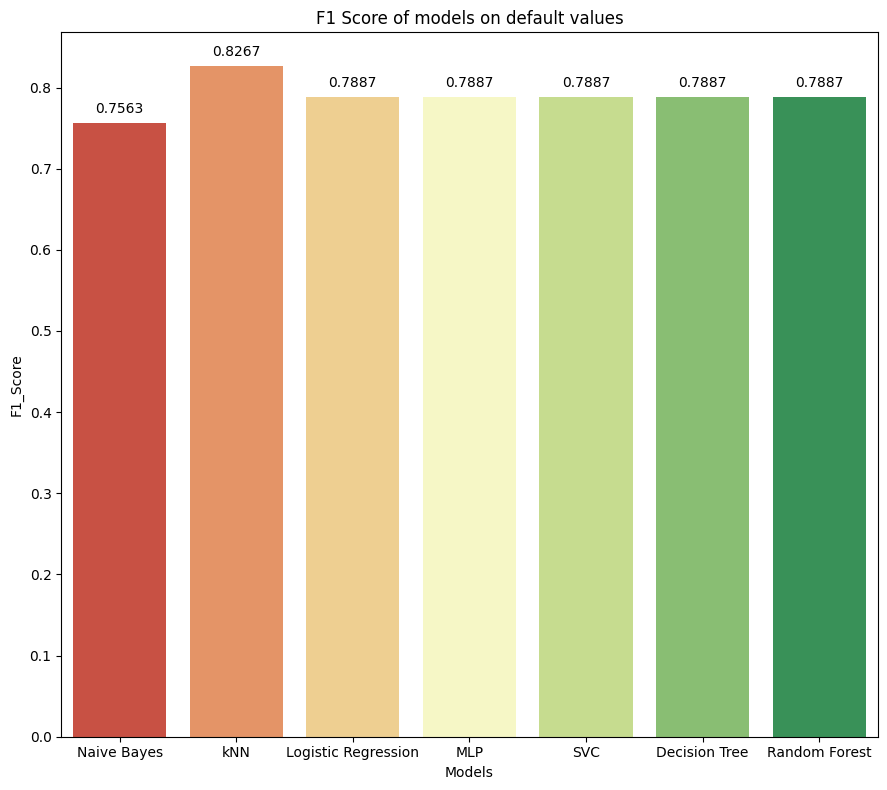

In [85]:
plt.figure(figsize=(9,8))
ax=sns.barplot(x=models.Model, 
            y=models.F1_Score, 
            orient='v',
            palette='RdYlGn'
           )
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points'
               )
plt.xlabel('Models')
plt.title('F1 Score of models on default values')
plt.tight_layout();

In [408]:
models_hyp = pd.DataFrame({
    'Model': ['Naive Bayes', 'KNN', 'Logistic Regression', 'MLP',  'Decision Tree', 'Random Forest'],
    'F1_Score': [f1_nbc_hyp, f1_kNN_hyp, f1_reg_hyp, f1_mlp_hyp, f1_dt_hyp, f1_rf_hyp]})
models_hyp.sort_values(by='F1_Score', ascending=False)

,Model,F1_Score
1,KNN,0.907488
4,Decision Tree,0.884625
3,MLP,0.854310
5,Random Forest,0.846951
2,Logistic Regression,0.786175
0,Naive Bayes,0.766840


C:\Users\giank\AppData\Local\Temp\ipykernel_30432\1683271915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ay=sns.barplot(x=models_hyp.Model,


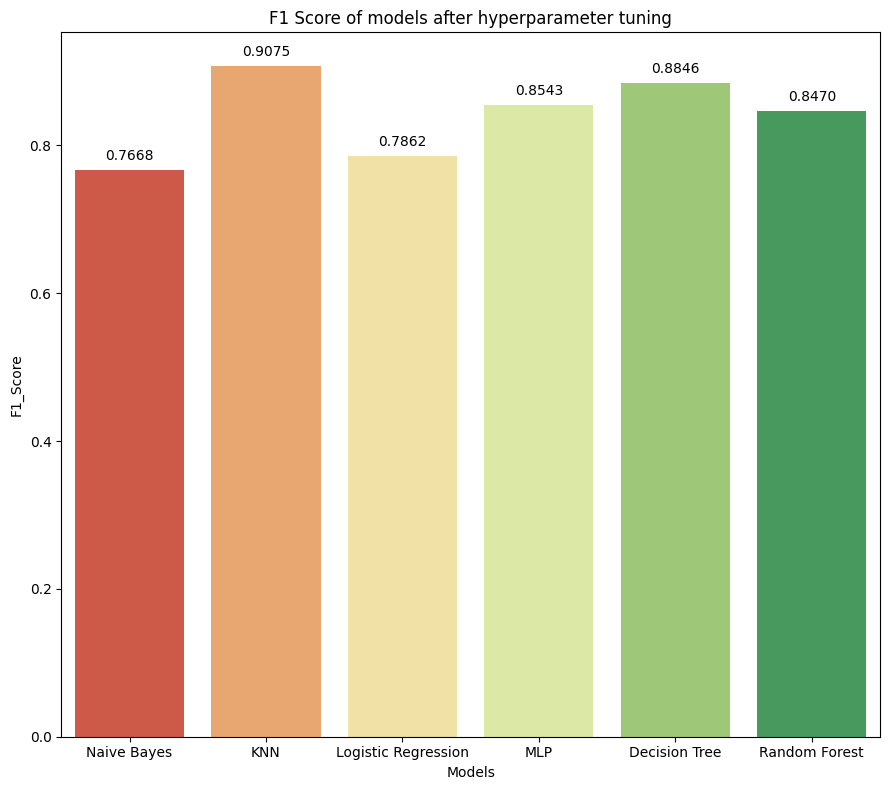

In [409]:
plt.figure(figsize=(9,8))
ay=sns.barplot(x=models_hyp.Model, 
            y=models_hyp.F1_Score, 
            orient='v',
            palette='RdYlGn'
           )
for p in ay.patches:
    ay.annotate(f'{p.get_height():.4f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points'
               )
plt.xlabel('Models')
plt.title('F1 Score of models after hyperparameter tuning')
plt.tight_layout();

### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

In [379]:
import pandas as pd

In [686]:
train_test.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,RainToday,WindDirCombined,WindSpeedMean,AvgHumidity,PressureMean,AvgCloud,TempRange,year,month,day
0,Albury,14.6,30.0,0.0,NaN,NaN,NE,37.0,0,EN,11.5,43.0,1013.75,2.0,10.9,2009,3,22
1,Albury,10.7,21.9,0.0,NaN,NaN,W,63.0,0,NW,28.5,35.5,1009.00,NaN,-1.6,2009,4,15
2,Albury,5.7,21.4,0.0,NaN,NaN,ESE,17.0,0,ENS,6.5,53.5,1023.05,NaN,8.7,2009,4,21
3,Albury,10.6,16.2,0.0,NaN,NaN,WNW,39.0,0,ENS,5.5,80.0,1005.65,8.0,0.2,2009,4,24
4,Albury,3.7,19.1,0.0,NaN,NaN,SSE,19.0,0,ES,5.5,69.0,1021.75,NaN,11.5,2009,5,19


In [687]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9699 entries, 0 to 9698
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         9699 non-null   object 
 1   MinTemp          9664 non-null   float64
 2   MaxTemp          9683 non-null   float64
 3   Rainfall         9699 non-null   float64
 4   Evaporation      5560 non-null   float64
 5   Sunshine         5063 non-null   float64
 6   WindGustDir      9007 non-null   object 
 7   WindGustSpeed    9011 non-null   float64
 8   RainToday        9699 non-null   int64  
 9   WindDirCombined  9699 non-null   object 
 10  WindSpeedMean    9494 non-null   float64
 11  AvgHumidity      9421 non-null   float64
 12  PressureMean     8744 non-null   float64
 13  AvgCloud         5554 non-null   float64
 14  TempRange        9486 non-null   float64
 15  year             9699 non-null   int64  
 16  month            9699 non-null   int64  
 17  day           

In [688]:
oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33037 entries, 1966 to 11276
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         33037 non-null  int32  
 1   MinTemp          33037 non-null  float64
 2   MaxTemp          33037 non-null  float64
 3   Rainfall         33037 non-null  float64
 4   Evaporation      33037 non-null  float64
 5   Sunshine         33037 non-null  float64
 6   WindGustDir      33037 non-null  int32  
 7   WindGustSpeed    33037 non-null  float64
 8   RainToday        33037 non-null  float64
 9   RainTomorrow     33037 non-null  float64
 10  year             33037 non-null  int64  
 11  month            33037 non-null  int64  
 12  day              33037 non-null  int64  
 13  WindSpeedMean    33037 non-null  float64
 14  PressureMean     33037 non-null  float64
 15  TempRange        33037 non-null  float64
 16  WindDirCombined  33037 non-null  int32  
 17  AvgHumidi

In [689]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9699 entries, 0 to 9698
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         9699 non-null   object 
 1   MinTemp          9664 non-null   float64
 2   MaxTemp          9683 non-null   float64
 3   Rainfall         9699 non-null   float64
 4   Evaporation      5560 non-null   float64
 5   Sunshine         5063 non-null   float64
 6   WindGustDir      9007 non-null   object 
 7   WindGustSpeed    9011 non-null   float64
 8   RainToday        9699 non-null   int64  
 9   WindDirCombined  9699 non-null   object 
 10  WindSpeedMean    9494 non-null   float64
 11  AvgHumidity      9421 non-null   float64
 12  PressureMean     8744 non-null   float64
 13  AvgCloud         5554 non-null   float64
 14  TempRange        9486 non-null   float64
 15  year             9699 non-null   int64  
 16  month            9699 non-null   int64  
 17  day           

In [413]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2

In [690]:
from sklearn.impute import SimpleImputer

#dixnw ta missing values
print("Οι τιμές που λείπουν απο την κάθε κατηγορία:")
missing_values = train_test.isnull().sum()
print(missing_values,train_test.shape)


# xwrizw ta columns se katigorikes metablites kai arithmitikes metablites
numeric_cols = train_test.select_dtypes(include=['float64']).columns
categorical_cols = train_test.select_dtypes(include=['object']).columns

# apo to SimpleImputer epilegw to average gia ta columns pou exoun arithmous
numeric_imputer = SimpleImputer(strategy='mean')

# Enw gia ta categorical to value me ta perissotera appearances
categorical_imputer = SimpleImputer(strategy='most_frequent')

# ta kanw apply sto df
train_test[numeric_cols] = numeric_imputer.fit_transform(train_test[numeric_cols])
train_test[categorical_cols] = categorical_imputer.fit_transform(train_test[categorical_cols])

# deixnw oti den mou leipei tipota!
print("Οι τιμές που λείπουν απο την κάθε κατηγορία:")
missing_values = train_test.isnull().sum()
print(missing_values,train_test.shape)


Οι τιμές που λείπουν απο την κάθε κατηγορία:
Location              0
MinTemp              35
MaxTemp              16
Rainfall              0
Evaporation        4139
Sunshine           4636
WindGustDir         692
WindGustSpeed       688
RainToday             0
WindDirCombined       0
WindSpeedMean       205
AvgHumidity         278
PressureMean        955
AvgCloud           4145
TempRange           213
year                  0
month                 0
day                   0
dtype: int64 (9699, 18)
Οι τιμές που λείπουν απο την κάθε κατηγορία:
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
RainToday          0
WindDirCombined    0
WindSpeedMean      0
AvgHumidity        0
PressureMean       0
AvgCloud           0
TempRange          0
year               0
month              0
day                0
dtype: int64 (9699, 18)


In [691]:
#dixnw ta missing values
print("Οι τιμές που λείπουν απο την κάθε κατηγορία:")
missing_values = train_test.isnull().sum()
print(missing_values,train_test.shape)


# xwrizw ta columns se katigorikes metablites kai arithmitikes metablites
numeric_cols = train_test.select_dtypes(include=['float64']).columns
categorical_cols = train_test.select_dtypes(include=['object']).columns

# apo to SimpleImputer epilegw to average gia ta columns pou exoun arithmous
numeric_imputer = SimpleImputer(strategy='mean')

# Enw gia ta categorical to value me ta perissotera appearances
categorical_imputer = SimpleImputer(strategy='most_frequent')

# ta kanw apply sto df
train_test[numeric_cols] = numeric_imputer.fit_transform(train_test[numeric_cols])
train_test[categorical_cols] = categorical_imputer.fit_transform(train_test[categorical_cols])

# deixnw oti den mou leipei tipota!
print("Οι τιμές που λείπουν απο την κάθε κατηγορία:")
missing_values = train_test.isnull().sum()
print(missing_values,train_test.shape)

Οι τιμές που λείπουν απο την κάθε κατηγορία:
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
RainToday          0
WindDirCombined    0
WindSpeedMean      0
AvgHumidity        0
PressureMean       0
AvgCloud           0
TempRange          0
year               0
month              0
day                0
dtype: int64 (9699, 18)
Οι τιμές που λείπουν απο την κάθε κατηγορία:
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
RainToday          0
WindDirCombined    0
WindSpeedMean      0
AvgHumidity        0
PressureMean       0
AvgCloud           0
TempRange          0
year               0
month              0
day                0
dtype: int64 (9699, 18)


In [692]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
for i in train_test:
    if train_test[i].dtype=='object':
        train_test[i] = le.fit_transform(train_test[i])
    else:
        continue

In [693]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9699 entries, 0 to 9698
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         9699 non-null   int32  
 1   MinTemp          9699 non-null   float64
 2   MaxTemp          9699 non-null   float64
 3   Rainfall         9699 non-null   float64
 4   Evaporation      9699 non-null   float64
 5   Sunshine         9699 non-null   float64
 6   WindGustDir      9699 non-null   int32  
 7   WindGustSpeed    9699 non-null   float64
 8   RainToday        9699 non-null   int64  
 9   WindDirCombined  9699 non-null   int32  
 10  WindSpeedMean    9699 non-null   float64
 11  AvgHumidity      9699 non-null   float64
 12  PressureMean     9699 non-null   float64
 13  AvgCloud         9699 non-null   float64
 14  TempRange        9699 non-null   float64
 15  year             9699 non-null   int64  
 16  month            9699 non-null   int64  
 17  day           

In [697]:
oversampled.drop(['RainTomorrow'], axis = 1,inplace=True) 


In [698]:
oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33037 entries, 1966 to 11276
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         33037 non-null  int32  
 1   MinTemp          33037 non-null  float64
 2   MaxTemp          33037 non-null  float64
 3   Rainfall         33037 non-null  float64
 4   Evaporation      33037 non-null  float64
 5   Sunshine         33037 non-null  float64
 6   WindGustDir      33037 non-null  int32  
 7   WindGustSpeed    33037 non-null  float64
 8   RainToday        33037 non-null  float64
 9   year             33037 non-null  int64  
 10  month            33037 non-null  int64  
 11  day              33037 non-null  int64  
 12  WindSpeedMean    33037 non-null  float64
 13  PressureMean     33037 non-null  float64
 14  TempRange        33037 non-null  float64
 15  WindDirCombined  33037 non-null  int32  
 16  AvgHumidity      33037 non-null  float64
 17  AvgCloud 

In [699]:
my_classifier = knn

In [700]:
imputer = SimpleImputer(strategy='mean')
imp_data = imputer.fit_transform(train_test)

In [701]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imp_data)

In [702]:
predicted_raining = my_classifier.predict(imp_data)

In [703]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9699 entries, 0 to 9698
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         9699 non-null   int32  
 1   MinTemp          9699 non-null   float64
 2   MaxTemp          9699 non-null   float64
 3   Rainfall         9699 non-null   float64
 4   Evaporation      9699 non-null   float64
 5   Sunshine         9699 non-null   float64
 6   WindGustDir      9699 non-null   int32  
 7   WindGustSpeed    9699 non-null   float64
 8   RainToday        9699 non-null   int64  
 9   WindDirCombined  9699 non-null   int32  
 10  WindSpeedMean    9699 non-null   float64
 11  AvgHumidity      9699 non-null   float64
 12  PressureMean     9699 non-null   float64
 13  AvgCloud         9699 non-null   float64
 14  TempRange        9699 non-null   float64
 15  year             9699 non-null   int64  
 16  month            9699 non-null   int64  
 17  day           

In [704]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           48423 non-null  object 
 1   MinTemp            48423 non-null  float64
 2   MaxTemp            48423 non-null  float64
 3   Rainfall           48423 non-null  float64
 4   Evaporation        48423 non-null  float64
 5   Sunshine           48423 non-null  float64
 6   WindGustDir        48423 non-null  object 
 7   WindGustSpeed      48423 non-null  float64
 8   WindDir9am         48423 non-null  object 
 9   WindDir3pm         48423 non-null  object 
 10  Cloud9am           48423 non-null  float64
 11  Cloud3pm           48423 non-null  float64
 12  RainToday          48423 non-null  float64
 13  RainTomorrow       48423 non-null  float64
 14  year               48423 non-null  int64  
 15  month              48423 non-null  int64  
 16  day                484

In [705]:
num = list(range(1, len(predicted_raining)+1))

### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

In [706]:
predicted_raining = [int(x) for x in predicted_raining]

In [707]:
my_submission = pd.DataFrame({'id': num, 'RainTomorrow': predicted_raining})
my_submission.to_csv('submission.csv', index=False)

In [708]:
my_submission

,id,RainTomorrow
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
9694,9695,1
9695,9696,1
9696,9697,1
9697,9698,1


In [709]:
sum(predicted_raining)

9699